## Error de Redondeo en Diferencias Finitas

Las diferencias finitas se utilizan para aproximar las derivadas de una función dada.

Por ejemplo, las diferencias de primer orden aproximan la derivada en el siguiente sentido:

$$
f'(x) = \frac{f(x+h) - f(x)}{h} + \frac{f''(\zeta)}{2}h \;\; x \leq \zeta \leq x+h
$$

Esta expresión sale de aproximar $f(x+h)$ a partir del valor en $f(x)$ usando el teorema de aproximación de Taylor:

$$
f(x+h) = f(x) + f'(x)h + \frac{f''(\zeta)}{2}h^2 \;\;\;\; x \leq \zeta \leq x+h
$$

En el caso de aproximaciones numéricas en realidad la fórmula anterior no es válida ya que las diferencias que calculamos son sobre redondeos de las expresiones para ajustarlas al sistema de punto flotante empleado, $\mathcal{F}$. Es decir la differencia finita es sobre,

$$
\frac{\hat{f}(x+h) - \hat{f}(x)}{h} 
$$

Donde un $\hat{}$ denota los valores en $\mathcal{F}$.
Recordando las expresiones para los errores tenemos que 
$\hat{f}(x+h) = f(x+h)(1+\delta_1)$, $\hat{f}(x) = f(x)(1+\delta_0)$ y por lo tanto la fórmula anterior resulta:

$$
\frac{\hat{f}(x+h) - \hat{f}(x)}{h} = (\frac{f(x+h) - f(x)}{h} + \frac{f(x+h)\delta_1 + f(x)\delta_0}{h})(1+\delta)
$$

Y el error en la estimación de la derivada en término de las diferencias finitas adquiere un nuevo término (ignorando términos cuadráticos en el error):
$$
|f'(x) - \frac{\hat{f}(x+h) - \hat{f}(x)}{h}| \leq |\frac{f''(\zeta)}{2}h| + \frac{|f(x+h)|+|f(x)| + |f(x+h) - f(x)|}{h} \frac{\epsilon(1)}{2} \;\;\;\; x \leq \zeta \leq x+h
$$

Llamando $M_2 = \max_{\zeta \in [x,x+h]}{|f''(\zeta)|}$, $M_1 = \max_{\zeta \in [x,x+h]}{|f'(\zeta)|}$ $M_0 = \max_{\zeta \in [x,x+h]}|f(\zeta)|$

El error queda acotado por:

$$
error \leq \frac{M_2 h}{2} + \frac{M_1 \epsilon(1)}{2} + \frac{M_0\epsilon(1)}{h}
$$

Vemos que el error crece para valores muy pequeños de $h$ y también para valores muy grandes. Habrá por lo tanto un valor óptimo para $h$ donde la cota para el error será la menor posible. Para calcular este mínimo derivamos la expresión con respecto a $h$ y vemos donde se anula la derivada. 

$$
\frac{d}{dh}(\frac{M_2h}{2} + \frac{M_1 \epsilon(1)}{2} + \frac{M_0\epsilon(1)}{h}) = \frac{M_2}{2} - \frac{M_0\epsilon(1)}{h^2} = 0
$$

Lo cual nos da un valor de,

$$
h = \sqrt{\frac{2M_0 \epsilon(1)}{M_2}}
$$

In [1]:
using Plots

Como ejemplo tomamos $f(x) = x^2$ en $x=1$ entoces $M_2 := 2$ y $M_0 =1$ por lo tanto el $h_{min} = \sqrt{\epsilon(1)}$.

In [2]:
sqrt(eps(1.))

1.4901161193847656e-8

In [3]:
f(x) = x^2

f (generic function with 1 method)

In [4]:
Df(h,x) = (f(x+h) - f(x))/h

Df (generic function with 1 method)

Calculamos el error a la derivada segunda en $x=1$.

In [5]:
g_1(h) = Df(h,1) - 2

g_1 (generic function with 1 method)

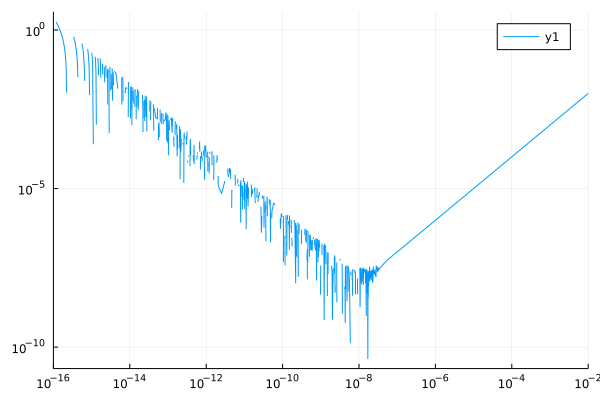

In [6]:
plot(g_1, xlim=(10^(-16),10^(-2)), yscale=:log10, xscale=:log10)

Para precisión simple (Float32) tenemos:

In [7]:
sqrt(eps(Float32(1)))

0.00034526698f0

In [8]:
g_32(h) = Df(convert(Float32,h),Float32(1)) - Float32(2)

g_32 (generic function with 1 method)

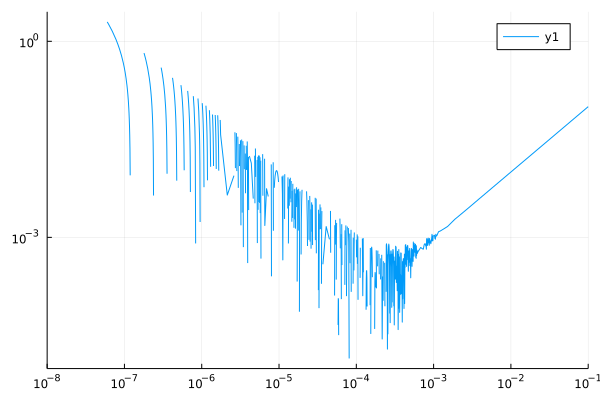

In [9]:
plot(g_32, xlim=(10^(-8),10^(-1)), xscale=:log10, yscale=:log10)

Ahora hacemos lo mismo pero evaluamos en $x=10^{-4}$, $x^2 = 10^{-8}$ allí tendremos,

$$
h_{min} = \sqrt{10^{-8}\epsilon(1)} = 10^{-4}\sqrt{\epsilon(1)}
$$

O sea el $h_{min}$ para este caso es menor en $4$ órdenes de magnitud.

In [10]:
10^(-4)*sqrt(eps(1.)) 

1.4901161193847659e-12

In [11]:
g_2(h) = Df(h,10^(-4)) - 2*10^(-4)

g_2 (generic function with 1 method)

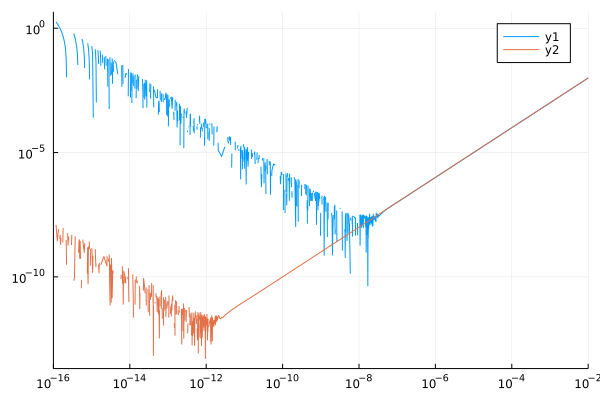

In [12]:
plot(g_1, xlim=(10^(-16),10^(-2)), yscale=:log10, xscale=:log10)
plot!(g_2, xlim=(10^(-16),10^(-2)), yscale=:log10, xscale=:log10)

In [13]:
g_2(10^(-10))

9.998717210636145e-11